In [77]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [32]:
# Process Data
from sklearn import datasets
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

# import data
iris = datasets.load_iris()
x = iris.data
y = iris.target

# Split data to training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, shuffle=True, random_state=1)

# scaling data
sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)


# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
from sklearn.model_selection import KFold
k_fold = KFold(n_splits=10)

Best: 0.955336 using {'max_depth': 4, 'max_leaf_nodes': 7}


Text(0.5, 0, 'max_depth')

Text(0, 0.5, 'score')

Text(0.5, 1.0, 'ValidationCurve_DT_MaxDepth_Iris')

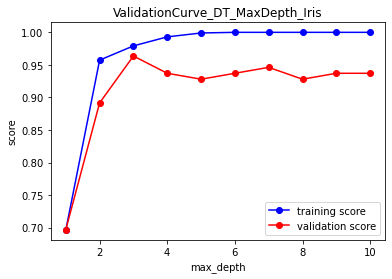

In [84]:
# Decision Tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
# Grid Search
parameters = {'max_depth': np.arange(1, 11), 'max_leaf_nodes':np.arange(2, 30)}
dt = tree.DecisionTreeClassifier()
grid_dt = GridSearchCV(dt, parameters)
grid_dt_result = grid_dt.fit(x_train, y_train)

# Summarize results
best_score, best_params = grid_dt_result.best_score_,grid_dt_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

from sklearn.model_selection import validation_curve
param_range = np.arange(1, 11)
train_score, val_score = validation_curve(tree.DecisionTreeClassifier(), x_train, y_train, param_name="max_depth", param_range=param_range, cv=10)

plt.plot(param_range, np.mean(train_score, 1), color='blue', label='training score', marker='o')
plt.plot(param_range, np.mean(val_score, 1), color='red', label='validation score', marker='o')
plt.legend(loc='best')
plt.xlabel('max_depth')
plt.ylabel('score')
plt.title("ValidationCurve_DT_MaxDepth_Iris")
plt.savefig('ValidationCurve1_DT_iris.png')



Text(0.5, 0, 'max_leaf_nodes')

Text(0, 0.5, 'score')

Text(0.5, 1.0, 'ValidationCurve_DT_MaxLeafNodes_Iris')

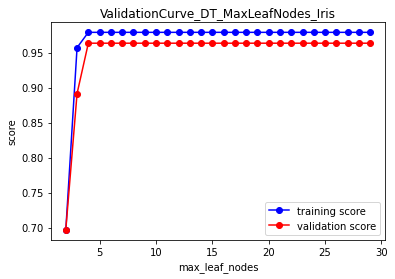

In [83]:
# Validation Curve for DT's number of nodes
param_range = np.arange(2, 30)
train_score, val_score = validation_curve(tree.DecisionTreeClassifier(max_depth=3), x_train, y_train, param_name="max_leaf_nodes", param_range=param_range, cv=10)

plt.plot(param_range, np.mean(train_score, 1), color='blue', label='training score', marker='o')
plt.plot(param_range, np.mean(val_score, 1), color='red', label='validation score', marker='o')
plt.legend(loc='best')
plt.xlabel('max_leaf_nodes')
plt.ylabel('score')
plt.title("ValidationCurve_DT_MaxLeafNodes_Iris")
plt.savefig('ValidationCurve2_DT_Iris.png')

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'data size')

Text(0, 0.5, 'score')

Text(0.5, 1.0, 'LearningCurve_DT_Iris')

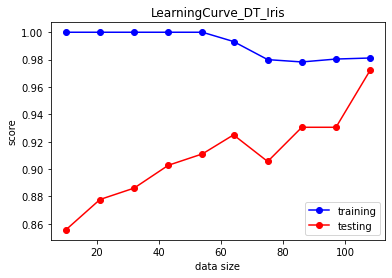

In [82]:
# Learning Curve
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(clf_DT, x_train, y_train, train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                                                                      cv=30, n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes,np.mean(train_scores,axis=1), color='blue', label="training", marker='o')
plt.plot(train_sizes,np.mean(test_scores,axis=1), color='red', label="testing", marker='o')
plt.xlabel("data size")
plt.ylabel("score")
plt.legend()
plt.title("LearningCurve_DT_Iris")
plt.savefig('LearningCurve_DT_Iris.png')

In [37]:
# based on validation curve for max_depth, we choose max_depth=2 for the model

clf_DT = tree.DecisionTreeClassifier(max_depth=3, max_leaf_nodes=5).fit(x_train, y_train)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf_DT, x_train, y_train, scoring='accuracy', cv=k_fold, n_jobs=-1)
scores.mean()

clf_DT.score(x_test, y_test)

0.9736842105263158

In [40]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
k = 5
clf_knn = KNeighborsClassifier(n_neighbors=k)
clf_knn.fit(x_train, y_train)
clf_knn.score(x_train, y_train)
clf_knn.score(x_test, y_test)

from sklearn import metrics
y_pred = clf_knn.predict(x_test)
score = metrics.accuracy_score(y_test, y_pred)
score

0.9736842105263158

Best: 0.955731 using {'n_neighbors': 6, 'weights': 'uniform'}


Text(0.5, 0, 'k_neighbors')

Text(0, 0.5, 'score')

Text(0.5, 1.0, 'ValidationCurve_KNN_Nneighbors_Iris')

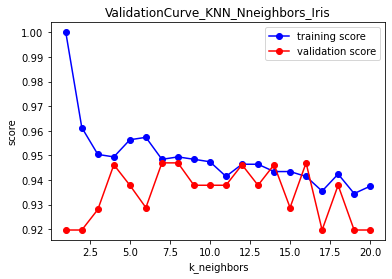

In [86]:
# Validation Curve for KNN
# Grid Search
parameters = {'n_neighbors': np.arange(1, 21, 1), 'weights': ['uniform', 'distance'] }
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, parameters)
grid_knn_result = grid_knn.fit(x_train, y_train)

# Summarize results
best_score, best_params = grid_knn_result.best_score_,grid_knn_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

# validation with n_neighbors
param_range = np.arange(1, 21, 1)
train_score, val_score = validation_curve(KNeighborsClassifier(), x_train, y_train, param_name="n_neighbors", 
                                          param_range=param_range, cv=10, scoring="accuracy", n_jobs=1)

plt.plot(param_range, np.mean(train_score, 1), color='blue', label='training score', marker='o')
plt.plot(param_range, np.mean(val_score, 1), color='red', label='validation score', marker='o')
plt.legend(loc='best')
plt.xlabel('k_neighbors')
plt.ylabel('score')
plt.title("ValidationCurve_KNN_Nneighbors_Iris")
plt.savefig('ValidationCurve_KNN_Nneighbors_Iris.png')

Text(0.5, 0, 'weights')

Text(0, 0.5, 'score')

Text(0.5, 1.0, 'ValidationCurve_KNN_weights_Iris')

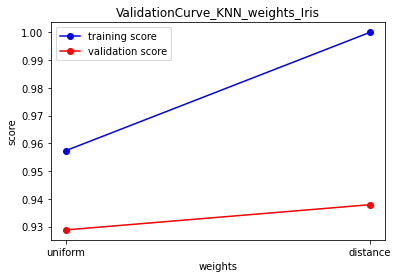

In [85]:
# validation with weights{‘uniform’, ‘distance’} 
param_range = ['uniform', 'distance']
train_score, val_score = validation_curve(KNeighborsClassifier(n_neighbors=6), x_train, y_train, param_name="weights", 
                                          param_range=param_range, cv=10, scoring="accuracy", n_jobs=1)

plt.plot(param_range, np.mean(train_score, 1), color='blue', label='training score', marker='o')
plt.plot(param_range, np.mean(val_score, 1), color='red', label='validation score', marker='o')
plt.legend(loc='best')
plt.xlabel('weights')
plt.ylabel('score')
plt.title("ValidationCurve_KNN_weights_Iris")
plt.savefig('ValidationCurve_KNN_weights_Iris.png')

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'data size')

Text(0, 0.5, 'score')

Text(0.5, 1.0, 'LearningCurve_KNN_Iris')

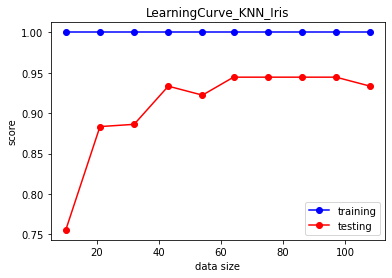

In [92]:
# Learning Curve

train_sizes, train_scores, test_scores = learning_curve(clf_knn, x_train, y_train, train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                                                                      cv=30, n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes,np.mean(train_scores,axis=1), color='blue', label="training", marker='o')
plt.plot(train_sizes,np.mean(test_scores,axis=1), color='red', label="testing", marker='o')
plt.xlabel("data size")
plt.ylabel("score")
plt.legend()
plt.title("LearningCurve_KNN_Iris")
plt.savefig('LearningCurve_KNN_Iris.png')

In [91]:
# based on validation curve for n_neighbors and weights, we choose k = 6 and distnace for the model

clf_knn = KNeighborsClassifier(n_neighbors=6, weights='distance').fit(x_train, y_train)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf_knn, x_train, y_train, scoring='accuracy', cv=k_fold, n_jobs=-1)
score

0.9736842105263158

In [99]:
# SVM
from sklearn import svm
clf_svm = svm.SVC().fit(x_train, y_train)
clf_svm.score(x_train, y_train)

from sklearn import metrics
y_pred = clf_svm.predict(x_test)
score = metrics.accuracy_score(y_test, y_pred)
score

0.9732142857142857

0.9736842105263158

In [126]:
# Validation Curve for KNN
# Grid Search
parameters = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': np.arange(0.0001, 10) }
grid_svm = GridSearchCV(svm.SVC(), parameters)
grid_svm_result = grid_svm.fit(x_train, y_train)

# Summarize results
best_score, best_params = grid_svm_result.best_score_,grid_svm_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

Best: 0.954941 using {'gamma': 0.0001, 'kernel': 'linear'}


Text(0.5, 0, 'kernel')

Text(0, 0.5, 'score')

Text(0.5, 1.0, 'ValidationCurve_SVM_kernel_Iris')

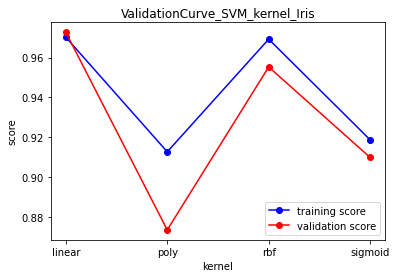

In [103]:
# validation with kernel
param_range = ['linear', 'poly', 'rbf', 'sigmoid']
train_score, val_score = validation_curve(svm.SVC(), x_train, y_train, param_name="kernel", 
                                          param_range=param_range, cv=10, scoring="accuracy", n_jobs=1)

plt.plot(param_range, np.mean(train_score, 1), color='blue', label='training score', marker='o')
plt.plot(param_range, np.mean(val_score, 1), color='red', label='validation score', marker='o')
plt.legend(loc='best')
plt.xlabel('kernel')
plt.ylabel('score')
plt.title("ValidationCurve_SVM_kernel_Iris")
plt.savefig('ValidationCurve_SVM_kernel_Iris.png')

Text(0.5, 0, 'gamma')

Text(0, 0.5, 'score')

Text(0.5, 1.0, 'ValidationCurve_SVM_gamma_Iris')

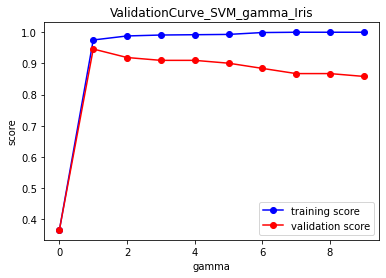

In [128]:
# Validation Curve for SVM
# validation with weights{‘uniform’, ‘distance’} 
param_range =  np.arange(0.0001, 10)
train_score, val_score = validation_curve(svm.SVC(kernel='rbf'), x_train, y_train, param_name='gamma', param_range=param_range, cv=10, scoring="accuracy", n_jobs=1)

plt.plot(param_range, np.mean(train_score, 1), color='blue', label='training score', marker='o')
plt.plot(param_range, np.mean(val_score, 1), color='red', label='validation score', marker='o')
plt.legend(loc='best')
plt.xlabel('gamma')
plt.ylabel('score')
plt.title("ValidationCurve_SVM_gamma_Iris")
plt.savefig('ValidationCurve_SVM_gamma_Iris.png')

In [121]:

# based on validation curve for n_neighbors and weights, we choose k = 6 and distnace for the model

clf_svm = svm.SVC(kernel='rbf', gamma=1).fit(x_train, y_train)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf_svm, x_train, y_train, scoring='accuracy', cv=k_fold, n_jobs=-1)
score

0.9736842105263158

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'data size')

Text(0, 0.5, 'score')

Text(0.5, 1.0, 'LearningCurve_SVM_Iris')

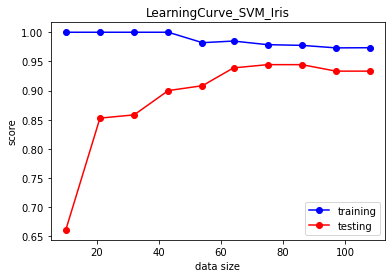

In [130]:
# Learning Curve

train_sizes, train_scores, test_scores = learning_curve(clf_svm, x_train, y_train, train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                                                                      cv=30, n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes,np.mean(train_scores,axis=1), color='blue', label="training", marker='o')
plt.plot(train_sizes,np.mean(test_scores,axis=1), color='red', label="testing", marker='o')
plt.xlabel("data size")
plt.ylabel("score")
plt.legend()
plt.title("LearningCurve_SVM_Iris")
plt.savefig('LearningCurve_SVM_Iris.png')

In [131]:
# based on validation curve for max_depth, we choose max_depth=2 for the model

clf_svm = svm.SVC(kernel='rbf', gamma=1).fit(x_train, y_train)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf_svm, x_train, y_train, scoring='accuracy', cv=k_fold, n_jobs=-1)
scores.mean()

clf_svm.score(x_test, y_test)

0.9371212121212121

0.9736842105263158

In [132]:
# Neural Network
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15, 15, 15), random_state=1, max_iter=10000,
                   learning_rate_int)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
score = metrics.accuracy_score(y_test, y_pred)
score

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(15, 15, 15), max_iter=10000,
              random_state=1, solver='lbfgs')

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 1, 1, 2, 1, 2, 2, 0, 1, 0])

0.9473684210526315

In [137]:
# Validation Curve for neural network
# Grid Search
parameters = {'learning_rate':['constant', 'invscaling', 'adaptive'],
              'hidden_layer_sizes': [(x,) for x in range(2,20,2)]
             }
grid_nn = GridSearchCV(MLPClassifier(max_iter=10000), parameters)
grid_nn_result = grid_nn.fit(x_train, y_train)

# Summarize results
best_score, best_params = grid_nn_result.best_score_,grid_nn_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

Best: 0.973123 using {'hidden_layer_sizes': (4,), 'learning_rate': 'invscaling'}


Text(0.5, 0, 'hidden_layer_sizes')

Text(0, 0.5, 'score')

Text(0.5, 1.0, 'ValidationCurve_NN_HiddenLayerSizes_Iris')

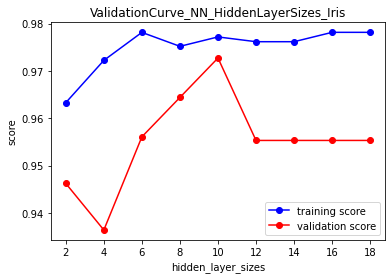

In [138]:
# Validation Curve for hidden_layer_sizes
param_range = [(x,) for x in range(2,20,2)]
train_score, val_score = validation_curve(MLPClassifier(max_iter=10000), x_train, y_train, param_name='hidden_layer_sizes', param_range=param_range, cv=10, scoring="accuracy", n_jobs=1)

plt.plot(param_range, np.mean(train_score, 1), color='blue', label='training score', marker='o')
plt.plot(param_range, np.mean(val_score, 1), color='red', label='validation score', marker='o')
plt.legend(loc='best')
plt.xlabel('hidden_layer_sizes')
plt.ylabel('score')
plt.title("ValidationCurve_NN_HiddenLayerSizes_Iris")
plt.savefig('ValidationCurve_NN_HiddenLayerSizes_Iris.png')

Text(0.5, 0, 'learning_rate_int')

Text(0, 0.5, 'score')

Text(0.5, 1.0, 'ValidationCurve_NN_LearningRate_Iris')

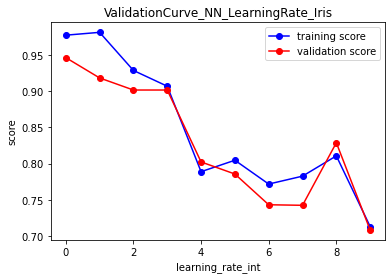

In [146]:
# validation with learning_rate_init
param_range = np.arange(0.001, 10)
train_score, val_score = validation_curve(MLPClassifier(max_iter=10000, hidden_layer_sizes=10), x_train, y_train, param_name="learning_rate_init", 
                                          param_range=param_range, cv=10, scoring="accuracy", n_jobs=1)

plt.plot(param_range, np.mean(train_score, 1), color='blue', label='training score', marker='o')
plt.plot(param_range, np.mean(val_score, 1), color='red', label='validation score', marker='o')
plt.legend(loc='best')
plt.xlabel('learning_rate_int')
plt.ylabel('score')
plt.title("ValidationCurve_NN_LearningRate_Iris")
plt.savefig('ValidationCurve_NN_LearningRate_Iris.png')

In [147]:
# we chose hidden_layer_size=10 and inital learning rate at 0.001

clf_nn = MLPClassifier(max_iter=10000, hidden_layer_sizes=10, learning_rate_init=0.001).fit(x_train, y_train)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf_nn, x_train, y_train, scoring='accuracy', cv=k_fold, n_jobs=-1)
score

0.9473684210526315

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'data size')

Text(0, 0.5, 'score')

Text(0.5, 1.0, 'LearningCurve_NeuralNetwork_Iris')

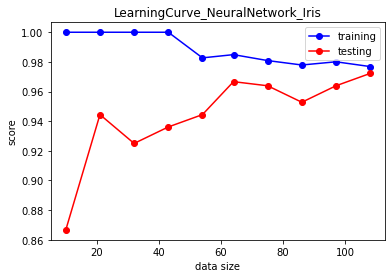

In [148]:
# Learning Curve

train_sizes, train_scores, test_scores = learning_curve(clf_nn, x_train, y_train, train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                                                                      cv=30, n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes,np.mean(train_scores,axis=1), color='blue', label="training", marker='o')
plt.plot(train_sizes,np.mean(test_scores,axis=1), color='red', label="testing", marker='o')
plt.xlabel("data size")
plt.ylabel("score")
plt.legend()
plt.title("LearningCurve_NeuralNetwork_Iris")
plt.savefig('LearningCurve_NeuralNetwork_Iris.png')

In [161]:
# Boosting
from sklearn.ensemble import AdaBoostClassifier
clf_ada = AdaBoostClassifier(base_estimator= clf_DT, n_estimators=100, learning_rate=1.0, random_state=0).fit(x_train, y_train)
clf_ada.score(x_train, y_train)
clf_ada.score(x_test, y_test)
y_predict = clf_ada.predict(x_test)
score = metrics.accuracy_score(y_test, y_pred)
score

1.0

0.9736842105263158

0.9473684210526315

In [167]:
# validation curve
# grid_search
parameters = {'n_estimators':np.arange(2, 50),
              'learning_rate': np.arange(1, 10)
             }
grid_ada = GridSearchCV(AdaBoostClassifier(base_estimator=clf_DT, random_state=1), parameters)
grid_ada_result = grid_ada.fit(x_train, y_train)

# Summarize results
best_score, best_params = grid_ada_result.best_score_,grid_ada_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

Best: 0.964427 using {'learning_rate': 2, 'n_estimators': 4}


Text(0.5, 0, 'n_estimators')

Text(0, 0.5, 'score')

Text(0.5, 1.0, 'ValidationCurve_AdaBoost_Nestimators_Iris')

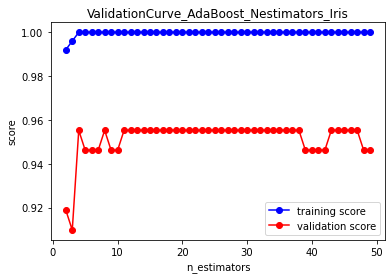

In [168]:
# Validation Curve for n_estimators
param_range = np.arange(2, 50)
train_score, val_score = validation_curve(AdaBoostClassifier(base_estimator=clf_DT, random_state=2), x_train, y_train, param_name='n_estimators', param_range=param_range, cv=10, scoring="accuracy", n_jobs=1)

plt.plot(param_range, np.mean(train_score, 1), color='blue', label='training score', marker='o')
plt.plot(param_range, np.mean(val_score, 1), color='red', label='validation score', marker='o')
plt.legend(loc='best')
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.title("ValidationCurve_AdaBoost_Nestimators_Iris")
plt.savefig('ValidationCurve_AdaBoost_Nestimators_Iris.png')

Text(0.5, 0, 'learning_rate')

Text(0, 0.5, 'score')

Text(0.5, 1.0, 'ValidationCurve_AdaBoost_LearningRate_Iris')

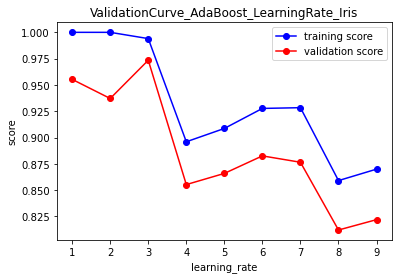

In [169]:
# validation with learning_rate
param_range = np.arange(1, 10)
train_score, val_score = validation_curve(AdaBoostClassifier(base_estimator=clf_DT, random_state=2), x_train, y_train, param_name='learning_rate', param_range=param_range, cv=10, scoring="accuracy", n_jobs=1)

plt.plot(param_range, np.mean(train_score, 1), color='blue', label='training score', marker='o')
plt.plot(param_range, np.mean(val_score, 1), color='red', label='validation score', marker='o')
plt.legend(loc='best')
plt.xlabel('learning_rate')
plt.ylabel('score')
plt.title("ValidationCurve_AdaBoost_LearningRate_Iris")
plt.savefig('ValidationCurve_AdaBoost_LearningRate_Iris.png')

In [171]:
# we chose hidden_layer_size=10 and inital learning rate at 0.001

clf_ada = AdaBoostClassifier(base_estimator=clf_DT, n_estimators=5, learning_rate=3).fit(x_train, y_train)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf_ada, x_train, y_train, scoring='accuracy', cv=k_fold, n_jobs=-1)
score

0.9473684210526315

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'data size')

Text(0, 0.5, 'score')

Text(0.5, 1.0, 'LearningCurve_AdaBoosting_Iris')

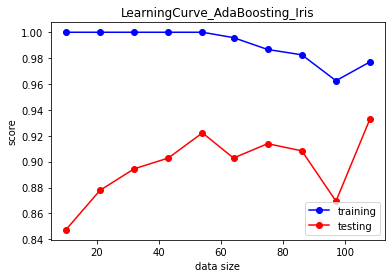

In [172]:
# Learning Curve

train_sizes, train_scores, test_scores = learning_curve(clf_ada, x_train, y_train, train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                                                                      cv=30, n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes,np.mean(train_scores,axis=1), color='blue', label="training", marker='o')
plt.plot(train_sizes,np.mean(test_scores,axis=1), color='red', label="testing", marker='o')
plt.xlabel("data size")
plt.ylabel("score")
plt.legend()
plt.title("LearningCurve_AdaBoosting_Iris")
plt.savefig('LearningCurve_AdaBoosting_Iris.png')